In [12]:
import numpy as np
import torch
import torchaudio.transforms
from matplotlib import pyplot as plt

from acoustic_locating_vq_vae.visualization import plot_spectrogram
from IPython.display import Audio, display

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
model = torch.load('/home/guy/PycharmProjects/Acoustic_Locating_VQ-VAE/models/model_speech.pt')
speech_spec, rir_spec, echoed_spec, sample_rate, theta, wiener_est = (
    torch.load('/home/guy/PycharmProjects/Acoustic_Locating_VQ-VAE/scripts/spec_data/20k_set/10500.pt'))

In [14]:
speech_spec = (speech_spec - torch.mean(speech_spec, dim=1, keepdim=True)) / (torch.std(speech_spec, dim=1, keepdim=True) + 1e-8)

speech_spec.shape
vq_loss, recon, perplexity = model(speech_spec.unsqueeze(0).to(device))

In [15]:
print(recon.shape)
print(speech_spec.shape)

torch.Size([1, 201, 1189])
torch.Size([201, 1184])


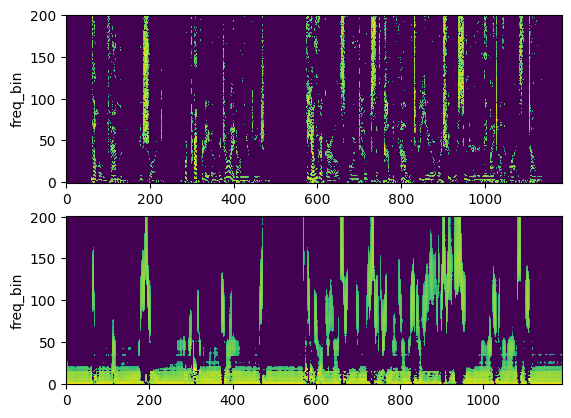

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1)
plot_spectrogram(speech_spec, ax=ax1)
plot_spectrogram(recon.squeeze().cpu().detach(), ax=ax2)

In [17]:
cfg_dict = np.load('/home/guy/PycharmProjects/Acoustic_Locating_VQ-VAE/scripts/spec_data/20k_set/dataset_config.npy', allow_pickle=True).item()
print(dict)

<class 'dict'>


In [18]:
sig_trans = torchaudio.transforms.InverseSpectrogram(n_fft=cfg_dict['NFFT'], hop_length=cfg_dict['HOP_LENGTH'])
sig = sig_trans(speech_spec.type(torch.complex64))
print(sig.shape)

recon_sig = sig_trans(recon.cpu().squeeze().type(torch.complex64))
print(recon_sig.shape)

torch.Size([189280])
torch.Size([190080])


In [19]:
print("Original")
display(Audio(sig, autoplay=True, rate=cfg_dict['fs']))

Original


In [20]:
print("Recon")
display(Audio(recon_sig.cpu().detach(), autoplay=True, rate=cfg_dict['fs']))

Recon
